<img src="img/logo_su.png" width="240" height="240" align="center"/>

<h1><center>Traitement du signal numérique</center></h1> 

<h1><center> Examen de TP - sujet J</center></h1> 

## Consignes

- le travail est à faire seul,
- les fichiers nécessaires pour faire ce TP sont disponibles sur Moodle dans le répertoire de votre groupe,
- pour chaque figure, on prendra soin de bien indiquer les axes,
- il faut déposer ce notebook à la fin de la séance dans la boîte de dépots de votre groupe sur Moodle, 

## Données personnelles

- NOM : Duvivier  
- Prénom : Valentin
- Parcours : CompMech
- Numéro étudiant : 3700091

## Présentation du problème

Vous disposez de l'enregistrement de la température moyenne mesurée à la station météorologique de MAASTRICHT.csv (contenu dans le fichier J_MAASTRICHT.csv). Il y a une mesure par jour depuis des dizaines d'années (à déterminer par la suite). Le but du problème est d'analyser ce signal particulier. On supposera que toutes les années ont 365 jours (pour simplifier les traitements, on ne prend pas en compte le jour supplémentaire des années bissextiles)

**Les mesures sont en degrés Celsius**

In [1]:
%matplotlib notebook
import numpy as np
import pylab as plt
from scipy.signal import find_peaks
import filtres as tns

## 1/ Analyse du signal de température en temps et en fréquence

Les données sont lues à partir d'un fichier "csv" (rien à faire à cette étape) : 

In [2]:
t, temp, annee, mois, jour = tns.read_csv("J_MAASTRICHT.csv")
print("Les données de ce fichier commencent le :", jour,"/",mois,"/",annee)
# t contient les jours
# temp contient la température moyenne

Les données de ce fichier commencent le : 1 / 1 / 1906


#### 1 - Combien de jours de mesures sont contenus dans le signal (à indiquer en jours et en années) ?

In [3]:
print(f"Il y a environ {int(len(t)/365)} année(s) soit {len(t)} jour(s) de mesures")

Il y a environ 114 année(s) soit 41972 jour(s) de mesures


#### 2 - Quelle est la fréquence d'échantillonnage $F_S$ (à exprimez en Hz) ?

On fait une mesure par jour, soit donc 1 mesure toutes les $60*60*24$ secondes.

In [4]:
Fs = len(t)/(len(t)*60*60*24)
Fs

1.1574074074074073e-05

$F_s \approx 1.16e^{-5} Hz$

#### 3 - Tracer l'évolution temporelle de l'ensemble du signal  ?

In [5]:
# Affichage evolution temporelle

plt.figure()

plt.plot(annee + t/365, temp, 'b-')

plt.title('Evolution temporelle température')
plt.xlabel('t [ans]')
plt.ylabel('temp [°C]')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'temp [°C]')

On peut voir que l'évolution n'est pas marquée et qu'elle semble bien correspondre à des température en °C.

#### 4 - Tracer l'évolution temporelle restreinte à l'année 1987 ?

Les mesures commencent en 1906, on prend donc les valeurs de la 82 eme annees.

In [6]:
# Affichage evolution temporelle

plt.figure()

plt.plot(annee + t[81*365:82*365]/365, temp[81*365:82*365], 'b-')

plt.title('Evolution temporelle température - 1987')
plt.xlabel('t [ans]')
plt.ylabel('temp [°C]')

plt.grid('True')

<IPython.core.display.Javascript object>

#### 5 - Construire le vecteur des fréquences (on le notera f) et tracer la TFD du signal en fonction de la fréquence. On limitera la représentation à l'intervalle [0:1e-7]Hz

In [7]:
# Vecteur
f = np.linspace(0, Fs, len(t))
#f = np.arange(0,Fe,Fe/N)

# Limitation ddans les basses frequences - eps = 10**-7 Hz
f = f*(f>10**-7)

# --------------------------------------------------------

# Code à compléter
TFD_f = np.fft.fft(f)

plt.figure(figsize=(10,5))

plt.plot(f, abs(TFD_f))
plt.title('TFD du signal associé à T°C'); plt.xlabel('frequence [Hz]'); plt.ylabel('|f|'); plt.grid('True')

<IPython.core.display.Javascript object>

#### 6  - Donner les valeurs approximatives des fréquences correspondant aux 2 principaux pics (notées respectivement $f1$ et $f2$ dans la suite) 

Après mesure sur le graphes, on obtient :
    
- $f_1 = 2.428e^{-6}$ Hz
- $f_2 = 7.75e^{-7}$ Hz

#### 7  - A quelle caractéristique correspond la fréquence nulle ? En déduire la température moyenne sur l'ensemble du signal ?

La fréquence nulle équivaut à la température qui revient le plus, soit le température moyenne.

In [9]:
print('Température moyenne = {:.3f} °C'.format(np.mean(temp)))

Température moyenne = 9.703 °C


#### 8 - L'analyse des données précédentes invite à modéliser la variation de température par la fonction $s(t) = T_0 + A \cos (\omega_0 t)$. Quelles valeurs approximatives vous semblent pertinentes pour $T_0$, $A$, $\omega$. Superposer cette fonction aux données pour vous assurer de la pertinences des paramètres (on pourra limiter la représentation aux 2000 premiers jours). Quel paramètre (simple) pourrait-on ajouter au modèle pour l'améliorer ?


D'après cette formule, il semble que T0 puisse être assimilé à la température moyenne et que la fonction cosinus représente des variations autour de cette position moyenne (plus et moins avec  le sinus).

On aura ainsi des oscillations avec une amplitude qui sera la $\underline{moitié}$ de la tempréature Tmax - Tmin.

Enfin, les oscillations sont d'une variation annuelle (Hiver - Ete) et donc on prend une oscillation sur une année, soit donc $Fa = \dfrac{1}{365*24*60*60}$ [Hz] et donc $\omega_0 = 2\pi Fa$.

Température moyenne = 9.703 °C
Ampliude A = 7.300 °C


<IPython.core.display.Javascript object>


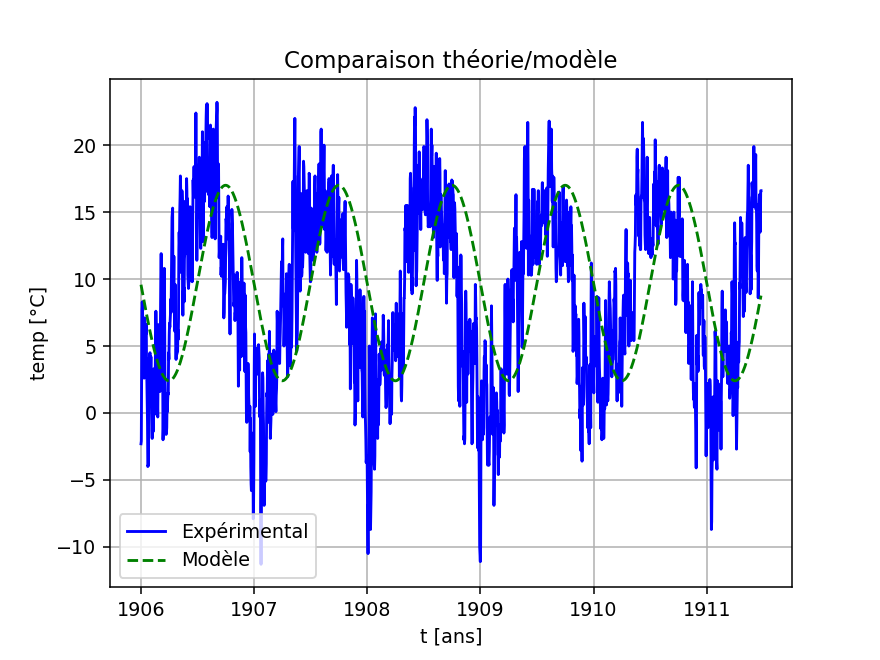

In [10]:
## Création modèle théorique

T0 = np.mean(temp)
print(f'Température moyenne = {T0:.3f} °C')

A = .5*(np.abs(max(temp)) - np.abs(min(temp)))
print(f'Ampliude A = {A:.3f} °C')

omega_0 = 2*np.pi*(1/365*24*60*60)

s = T0 + A*np.cos(omega_0 * t/24/60/60 + np.pi/2)

# -----------------------------------------

## Affichage comparaison

plt.figure()

plt.plot(annee + t[:2000]/365, temp[:2000], 'b-', label='Expérimental')
plt.plot(annee + t[:2000]/365, s[:2000], 'g--', label='Modèle')

plt.title('Comparaison théorie/modèle')
plt.xlabel('t [ans]')
plt.ylabel('temp [°C]')

plt.legend()
plt.grid('True')

Le modèle semble fiable même si il ne reproduit pas les oscillations journalières (nuit - jour). Un ajout pour mieux coller à la réalité serait de combiner sce modèle avec un autre pour les variations quotidiennes.

## 2/ Analyse des fluctuations lentes 


Dans cette partie on veut implémenter un filtre à moyenne mobile pour estimer l'évolution de la température moyenne en fonction du temps sur plusieurs années. L'équation récurrente de ce type de filtre est :
$$ y[n] = \frac{1}{L}\sum_{k=0}^{L-1} x[n-k]$$ 

#### 9 - Quel est la nature de ce filtre (RIF/RII)? Est-il stable ? Est-il causal ?


Le nombre de mesures de température est finie mais la tempréature elle ne va pas s'arrêter. Ainsi, il n'y a pas de point à partir duquel la température est ensuite nulle et donc le filtre est de $\underline{\text{type RII}}$. Il n'en reste pas moins $\underline{stable}$.

Pour finir, les mesures débute comme énoncé à partir de 1906, et donc aucune mesure n'est faite pour un temps négatif. Le filtre est bien $\underline{causal}$.

#### 10 - Créer une fonction pour implémenter ce filtre. 

**Note : pour faciliter l'implémentation du filtre, on pourra mettre à 0 les $L+1$ premières valeurs de la sortie : $y[0:L]=0$ puis utiliser l'équation récurrente.**


In [11]:
def filtre_1(x, n, L):
    
    """ Fonction pour calcul température moyenne """
    
    sum = 0
    
    for k in range(L-1):
        sum += x[n-k]
    
    return sum/L

# ----------------------------

## Test fonction - EXEMPLE

L = 50
x = np.linspace(1, 1, L)

y = np.zeros((L))

for n in range(5):
    y[n] = filtre_1(x, n, L)

# ----------------------------

print(y)

[0.98 0.98 0.98 0.98 0.98 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


#### 11 - Utiliser ensuite cette fonction pour filtrer le signal de température avec $L=3650$. Tracer l'évolution de la température pendant les 50 dernières années du signal.


<IPython.core.display.Javascript object>


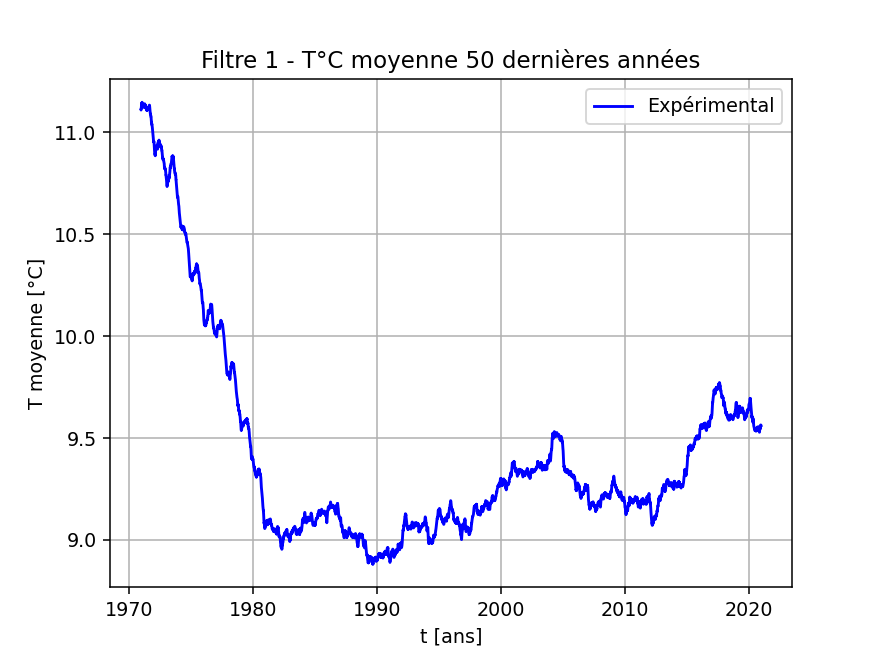

In [12]:
L = 3650

y = np.zeros((5*L)) #5*L car 5*10*365 == 1jour pdt 50 ans

for n in range(5*L):
    y[n] = filtre_1(temp, n, L)

# -----------------------------------------

## Affichage comparaison

plt.figure()

plt.plot(annee + t[-50*365:]/365, y, 'b-', label='Expérimental')

plt.title('Filtre 1 - T°C moyenne 50 dernières années')
plt.xlabel('t [ans]')
plt.ylabel('T moyenne [°C]')

plt.legend()
plt.grid('True')

#### 12 - Le résultat obtenu vous semble-t-il cohérent ? Quelles informations ce traitement permet-il d'obtenir facilement ?


On remarque que la température moyenne a subi une chute pendant les 10 premières années avant de retrouver une évolution progressive lente jusqu'à aujourd'hui. Cette évolution a engendrée une baisse d'environ 2°C puis un gain d'environ 0.5°C soit une évolution sur 50 ans de 1°C.

Ces résultats semblent cohérents en terme d'amplitude (valeurs de température) aux vus des graphes précédents. Néanmoins, la chute de la température de plusieurs degrés sur les 10 premières années semble moins cohérentes. Ces valeurs sont peut-être dûes au filtre utilisé ou bien à son implémentation.

Quoi qu'il en soit, le filtre permet d'obtenir facilement des variations de données sur une longues périodes (grands nombre de point). Cette mesure permet d'avoir une idée de l'évolution du signal d'une façon plus compréhensible. $\underline{\text{On voit les répercussions sur le climat d'évènement sur le long terme. On peut y assimiler l'étude des répercussion du réchauffemetn climatique par exemple qui se mesure sur plusieurs décennies.}}$

## 3/ Analyse des fluctuations rapides


Dans cette partie on veut filtrer le signal d'origine grâce à l'outil de synthèse de filtre utilisé dans le TP 2 pour ne garder que les fluctuations rapides du signal. On choisit d'utiliser un filtre RIF et dans la suite on désigne ce filtre 'FILTRE_RIF'.


<IPython.core.display.Javascript object>


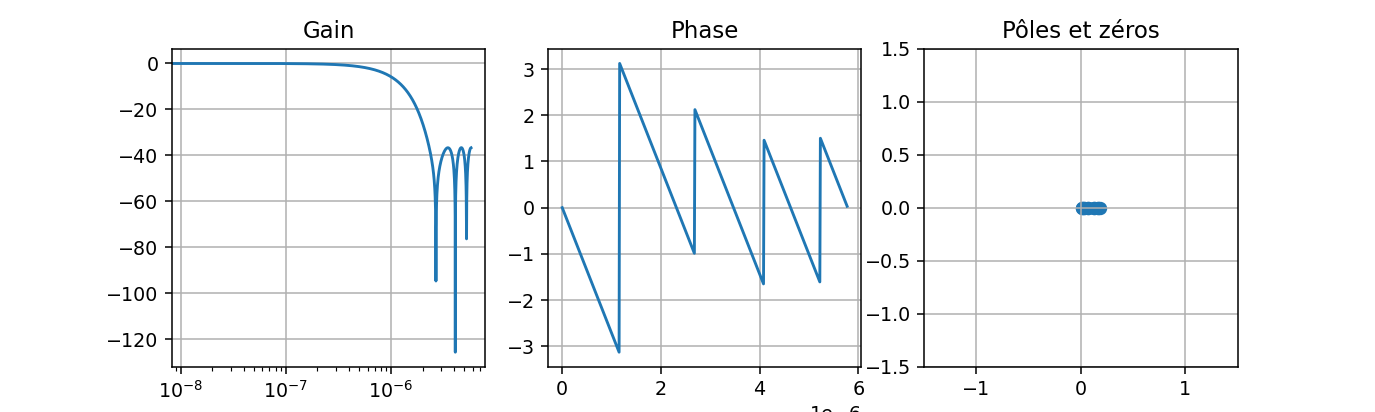

In [13]:
FILTRE_RIF = tns.filtre()
fig, ax    = plt.subplots(1,3,figsize=(10,3))
FILTRE_RIF.display(ax, fig)

#### 14 - Quel type de filtre faut-il choisir ? Quelle fréquence de coupure faut-il utiliser ? Quel ordre du filtre permet d'avoir un gain satisfaisant pour filtrer f1 ? 


On ne shouhaite garder que les fluctuations rapides de températures par application d'un filtre 2. 

Or, qui dit fluctuation rapide dit fluctuation sur un cours espace temporelle et donc que l'on ne charche à garder que les grandes fréquences. Ainsi, on va avoir tendance à appliquer un $\underline{\text{filtre passe haut}}$ pour ne laisser passer que les grandes fréquences et bloquer les faibles fréquences.

#### 15 - Utiliser ce filtre sur le signal de température.



On considère qu'une variation de 20°C sur une même journée est la limite pour une flucuation rapide. On aura donc $F_{lim} = $ les fréquences pour lesquelles de telles variations sont observées.

<IPython.core.display.Javascript object>


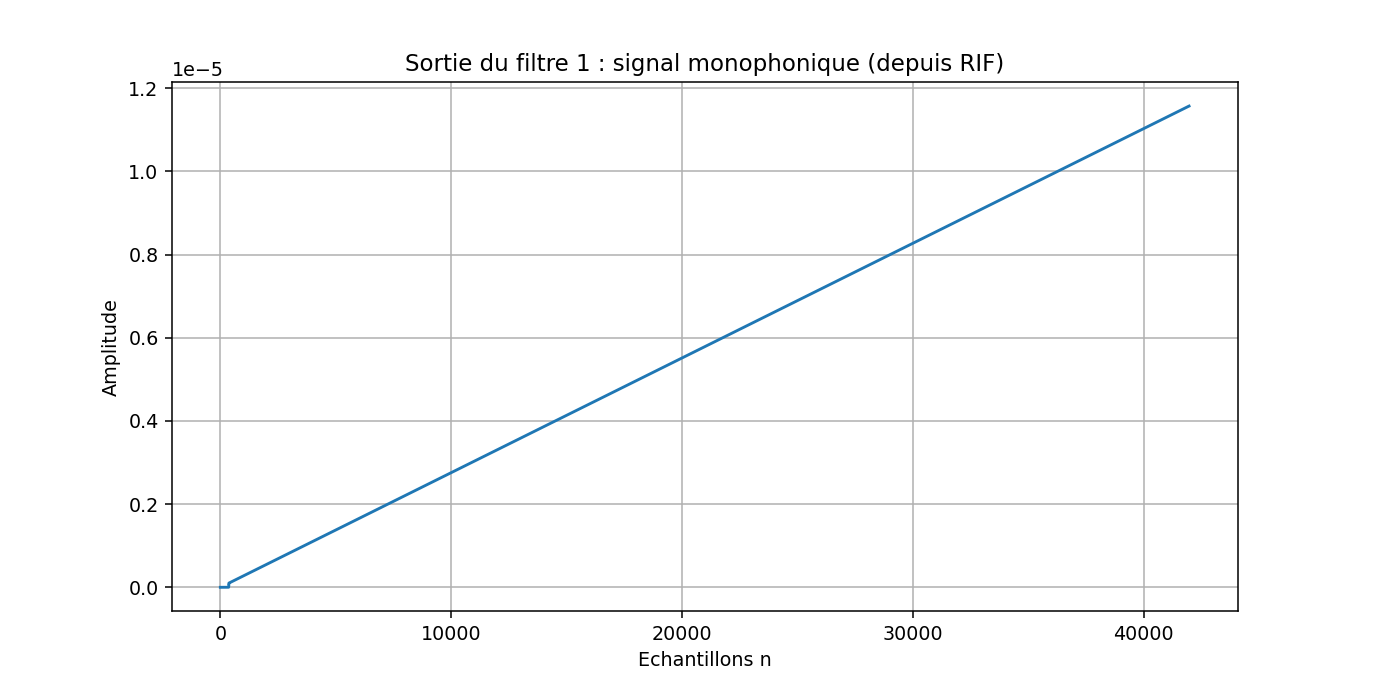

In [14]:
## Application filtre 2 RIF

n_rif, x_rif = FILTRE_RIF.filter(f)

plt.figure(figsize=(10,5))

plt.step(n_rif, x_rif)

plt.title(u'Sortie du filtre 2')
plt.xlabel('Echantillons n')
plt.ylabel('Amplitude')

plt.grid('True')

#### 16 - Le résultat obtenu vous semble-t-il cohérent ? Quelles informations ce traitement permet-il d'obtenir facilement ?


Le résultat attendu doit représenté de fortes évolutions temporelles, ce qui n'est pas le case sur le graphique que j'ai obtenu.

Ce traitement permete d'avoir des informations sur des données de changements brusques, souvent liées à un événement précis. On a ici les $\underline{\text{répercussion à court terme sur le climat}}$.
